In [1]:
# Загрузка библиотек
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt

import tensorflow as tf 
import keras

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

# Для центрирования графиков matplotlib
from IPython.core.display import HTML 
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# Проверка версий библиотек (librosa, tensorflow, keras)
print('librosa version: ', librosa.__version__)
print('tensorflow version: ', tf.__version__)
print('keras version: ',keras.__version__)

librosa version:  0.11.0
tensorflow version:  2.13.0
keras version:  2.13.1


In [5]:
# Проверка, работает ли tensorflow с GPU
tf.config.list_physical_devices('GPU')

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11504153675613624155
xla_global_id: -1
]


In [7]:
# Вычисление хромограммы
def create_chromogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    #chroma = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=60, n_chroma=60)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

# Перевод хромограммы в картинку png
def create_pngs_from_mp3(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.mp3', '.png'))
        create_chromogram(input_file, output_file)

In [9]:
# Вычисление mel-спектрограммы
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

# Перевод mel-спектрограммы в картинку png
def create_pngs_from_mp3(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.mp3', '.png'))
        create_spectrogram(input_file, output_file)

In [88]:
# Создаем PNG-файлы, из спектрограмм WAV-файлов каталога "background"
create_pngs_from_mp3('C:/Users/Mary/Desktop/Диплом/MER_audio_taffc_dataset/Q1', 'C:/Users/Mary/Desktop/Диплом/Chromogram/Q1')

In [90]:
create_pngs_from_mp3('C:/Users/Mary/Desktop/Диплом/MER_audio_taffc_dataset/Q2', 'C:/Users/Mary/Desktop/Диплом/Chromogram/Q2')

In [92]:
create_pngs_from_mp3('C:/Users/Mary/Desktop/Диплом/MER_audio_taffc_dataset/Q3', 'C:/Users/Mary/Desktop/Диплом/Chromogram/Q3')

In [94]:
create_pngs_from_mp3('C:/Users/Mary/Desktop/Диплом/MER_audio_taffc_dataset/Q4', 'C:/Users/Mary/Desktop/Диплом/Chromogram/Q4')

In [11]:
# Методы для загрузки и отображения хромограмм
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(tf.keras.utils.img_to_array(tf.keras.utils.load_img(os.path.join(path, file), target_size=(224, 224, 3))))        
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

#  Списки: для хранения изображений хромограмм и хранения меток классов.
x = []
y = []

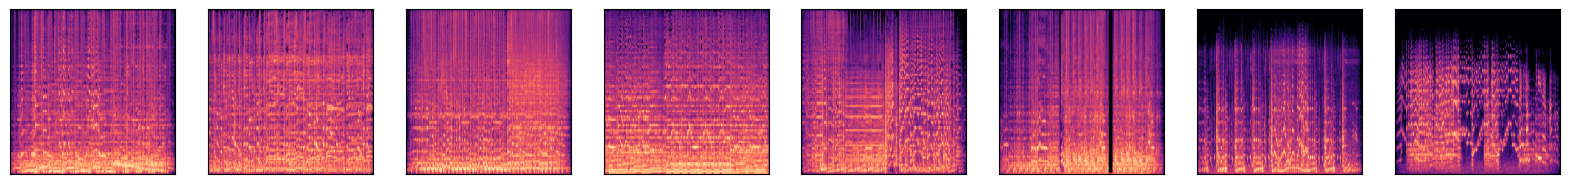

In [13]:
# Загружаем картинки хромограмм и добавляем их в список
images, labels = load_images_from_path('C:/Users/Mary/Desktop/Диплом/Chromogram/Q1', 0)
show_images(images)
    
x += images
y += labels

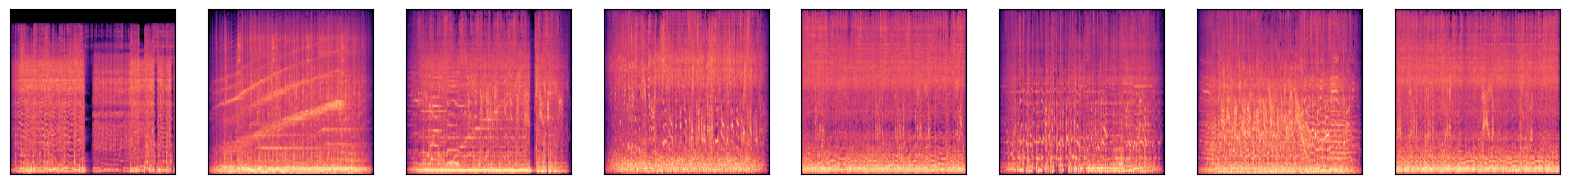

In [15]:
images, labels = load_images_from_path('C:/Users/Mary/Desktop/Диплом/Chromogram/Q2', 1)
show_images(images)
    
x += images
y += labels

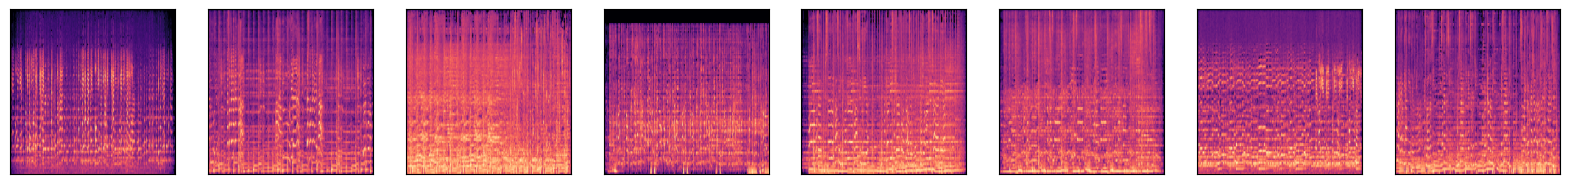

In [17]:
images, labels = load_images_from_path('C:/Users/Mary/Desktop/Диплом/Chromogram/Q3', 2)
show_images(images)
    
x += images
y += labels

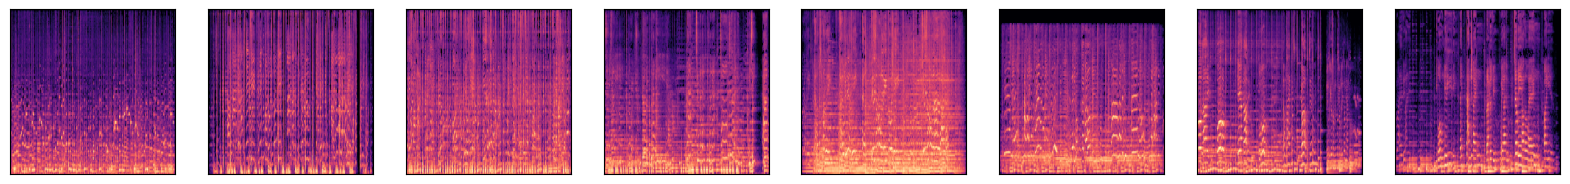

In [18]:
images, labels = load_images_from_path('C:/Users/Mary/Desktop/Диплом/Chromogram/Q4', 3)
show_images(images)
    
x += images
y += labels

In [21]:
# Разделяем набор на тренировочную и тестовую части
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Нормировка пикселей в (0,1)
x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

# Преобразуем в матрицу
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [39]:
# Оставляем только сообщения об ошибках
tf.get_logger().setLevel('ERROR')  

# Определяем пустую модель (без слоев)
model = Sequential()

# Convolutional layer (сверточный слой): создает ядро ​​свертки, которое сворачивается с входными данными слоя по двумерному измерению
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Pooling layer (слой “подвыборки”), уменьшает выборку с помощью сжатия входных данных
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer (сглаживающий слой): сглаживает входные тензоры в одно измерение — используется как переходной между сверточными полностью связанными слоями
model.add(Flatten())

# Добавляем полносвязный слой
model.add(Dense(1024, activation='relu'))
# Добавим полносвязный слой: размерность выходного пространства - 4,  функция активации - softmax
model.add(Dense(4, activation='softmax'))

# Настройка модели для обучения
# Параметры: функция потерь - categorical_crossentropy, оптимизатор - adam, метрика - accuracy
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc','mse', 'mae', 'cosine_proximity'])

# Выводим структуру модели
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [41]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger

# Сохраняем model checkpoint file
best_model_file="./best_model_trained.hdf5"

MAX_PATIENT = 12
# epochs = MAX_EPOCHS: количество эпох для обучения модели.
MAX_EPOCHS = 20
# batch_size = MAX_BATCH: количество выборок на обновление градиента
MAX_BATCH = 10

callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

# Запускаеми обучение
print ("Обучение модели началось ... пожалуйста, подождите.")

# x_train_norm: массив данных обучения
# y_train_encoded: массив целевых данных
# validation_data: данные, на основе которых можно оценить показатели модели в конце каждой эпохи. Модель не обучается на этих данных.
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=MAX_BATCH, epochs=MAX_EPOCHS, callbacks=callback)

print ("Обучение модели закончено.")

Обучение модели началось ... пожалуйста, подождите.
Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 1.4963 - acc: 0.2571 - mse: 0.1918 - mae: 0.3738 - cosine_proximity: 0.4931
Epoch 1: loss improved from inf to 1.49630, saving model to .\best_model_trained.hdf5
63/63 [==============================] - 99s 1s/step - loss: 1.4963 - acc: 0.2571 - mse: 0.1918 - mae: 0.3738 - cosine_proximity: 0.4931 - val_loss: 1.1833 - val_acc: 0.4037 - val_mse: 0.1643 - val_mae: 0.3425 - val_cosine_proximity: 0.5871 - lr: 0.0010
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 1.2000 - acc: 0.4349 - mse: 0.1671 - mae: 0.3259 - cosine_proximity: 0.5768
Epoch 2: loss improved from 1.49630 to 1.20003, saving model to .\best_model_trained.hdf5
63/63 [==============================] - 86s 1s/step - loss: 1.2000 - acc: 0.4349 - mse: 0.1671 - mae: 0.3259 - cosine_proximity: 0.5768 - val_loss: 1.2147 - val_acc: 0.4111 - val_mse: 0.1676 - val_mae: 0.3234 - val_cosine_proximi

# Изменения для предотвращения переобучения

In [21]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers import Dropout

# Оставляем только сообщения об ошибках
tf.get_logger().setLevel('ERROR')

# Определяем модель
model = Sequential()

# Convolutional layer (сверточный слой)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))  # уменьшил количество фильтров
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))  # уменьшил количество фильтров
model.add(MaxPooling2D(2, 2))

# Добавляем слой Dropout для предотвращения переобучения
model.add(Dropout(0.5))  # 50% нейронов будут исключены

# Flatten layer
model.add(Flatten())

# Полносвязный слой
model.add(Dense(512, activation='relu'))  # уменьшил количество нейронов
model.add(Dropout(0.5))  # добавляем Dropout

# Выходной слой
model.add(Dense(4, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Выводим структуру модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [37]:
# Колбэки
best_model_file = "./best_model_trained.hdf5"
MAX_PATIENT = 12
MAX_EPOCHS = 20  # увеличил количество эпох для более точного обучения
MAX_BATCH = 10

callbacks = [
    EarlyStopping(patience=MAX_PATIENT, monitor='val_loss', verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
    ModelCheckpoint(filepath=best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
]

# Запускаем обучение
print("Обучение модели началось ... пожалуйста, подождите.")
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded),
                 batch_size=MAX_BATCH, epochs=MAX_EPOCHS, callbacks=callbacks)
print("Обучение модели закончено.")

Обучение модели началось ... пожалуйста, подождите.
Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.0000 - mse: 6.0750e-04 - mae: 0.0044 - cosine_proximity: 0.9990
Epoch 1: val_loss improved from inf to 4.36092, saving model to .\best_model_trained.hdf5
63/63 [==============================] - 67s 1s/step - loss: 0.0096 - acc: 1.0000 - mse: 6.0750e-04 - mae: 0.0044 - cosine_proximity: 0.9990 - val_loss: 4.3609 - val_acc: 0.4556 - val_mse: 0.2379 - val_mae: 0.2700 - val_cosine_proximity: 0.4954 - lr: 1.0000e-05
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 0.0094 - acc: 1.0000 - mse: 5.8171e-04 - mae: 0.0043 - cosine_proximity: 0.9991
Epoch 2: val_loss did not improve from 4.36092
63/63 [==============================] - 74s 1s/step - loss: 0.0094 - acc: 1.0000 - mse: 5.8171e-04 - mae: 0.0043 - cosine_proximity: 0.9991 - val_loss: 4.3787 - val_acc: 0.4556 - val_mse: 0.2379 - val_mae: 0.2699 - val_cosine_proximity: 0.4955 - lr: 1.

In [49]:
# Оценка модели
score = model.evaluate(x_train_norm, y_train_encoded, verbose=0) 
print ("Оценка на тренировочной выборке  : ",round(score[1]*100) , "%")

score = model.evaluate(x_test_norm, y_test_encoded, verbose=0) 
print ("Оценка на тестовой               : ",round(score[1]*100) , "%")

Оценка на тренировочной выборке  :  100 %
Оценка на тестовой               :  50 %


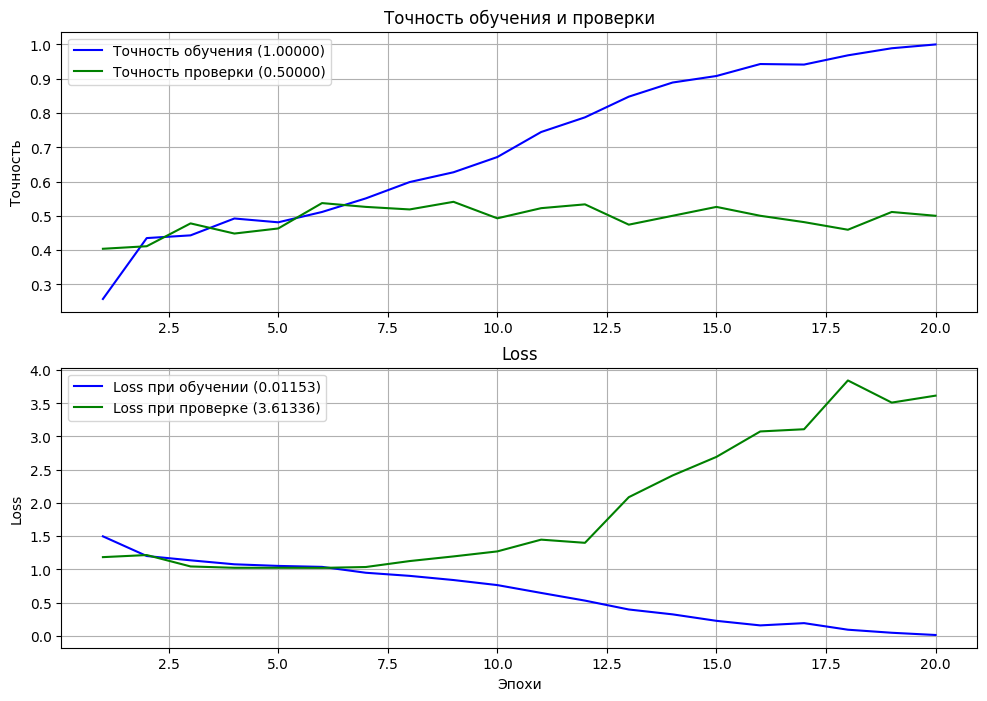

In [47]:
# История обучения модели

# Графики функции потерь и метрики accuracy для тренировочного и валидационного наборов
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Нет данных для функции потерь')
        return 
    plt.figure(figsize=(26,8))
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    # График для Accuracy
    plt.subplot(221)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Точность обучения (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Точность проверки (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Точность обучения и проверки')
    plt.ylabel('Точность')
    plt.legend(loc="best")
    plt.grid(True)
    
    # График для функции потерь
    plt.subplot(223, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Loss при обучении (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Loss при проверке (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Эпохи')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)    
    plt.show()

plot_history(hist)

9/9 [==============================] - 9s 865ms/step


Text(110.44999999999997, 0.5, 'Реальные')

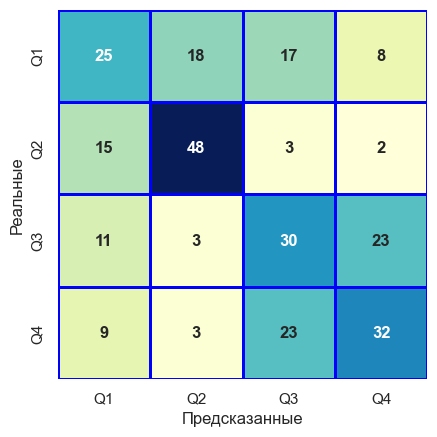

In [51]:
# Построим матрицу путанности
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_test_norm)

mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['Q1', 'Q2', 'Q3', 'Q4']

sns.heatmap(mat,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            cmap='YlGnBu',
            linewidths=1.0,
            linecolor = "blue",
            annot_kws={"size": 12,'fontweight': 'bold'},
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Предсказанные')
plt.ylabel('Реальные')